In [350]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
%matplotlib inline



df=pd.read_csv('data/preprocess.csv')

y = np.array(df['shot_made_flag']).astype(int)
X = df.drop('shot_made_flag', 1)


cat_ftrs = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent', 'loc_x', 'loc_y','playoffs','home_play']

cont_ftrs1 = ['shot_distance', 'time_remaining']

X[cont_ftrs1] = X[cont_ftrs1].astype(float)
y = y.astype(float)

In [353]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# one-hot encoder

ohe = OneHotEncoder(sparse=False)
cat_values = ohe.fit_transform(X[cat_ftrs])
cat_ftr_names = ohe.get_feature_names(cat_ftrs)
df_cat = pd.DataFrame(data=cat_values,columns = cat_ftr_names)

#ss = StandardScaler()
#count_values = ss.fit_transform(X[cont_ftrs1])
#df_cont1 = pd.DataFrame(data=count_values,columns = cont_ftrs1)


X_process = pd.concat([df_cat,X[cont_ftrs1]],axis=1)

scaler = StandardScaler()
X_process[cont_ftrs1] = scaler.fit_transform(X_process[cont_ftrs1])

In [354]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier


## NB

In [358]:

m=[]
sd=[]


neighbors = np.logspace(-11,-7,5)
param_grid = dict(var_smoothing=neighbors)
model = GaussianNB()
kfold = KFold(n_splits=5, random_state=50)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(X_process, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
m.append(means)
sd.append(stds)
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.472117 using {'var_smoothing': 1e-07}
0.455150 (0.009739) with: {'var_smoothing': 1e-11}
0.462116 (0.004135) with: {'var_smoothing': 1e-10}
0.464762 (0.006517) with: {'var_smoothing': 1e-09}
0.466358 (0.005475) with: {'var_smoothing': 1e-08}
0.472117 (0.007190) with: {'var_smoothing': 1e-07}


In [360]:
print(1-np.mean(m))
print(np.mean(sd))

0.5358991321944196
0.006611091255842009


## Tune KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier
m=[]
sd=[]


neighbors = np.arange(21,51,2)
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=5, random_state=50)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(X_process, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
m.append(means)
sd.append(stds)
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    


Best: 0.643266 using {'n_neighbors': 49}
0.632292 (0.009987) with: {'n_neighbors': 21}
0.631980 (0.013196) with: {'n_neighbors': 23}
0.633148 (0.013005) with: {'n_neighbors': 25}
0.632759 (0.010774) with: {'n_neighbors': 27}
0.635677 (0.011701) with: {'n_neighbors': 29}
0.637740 (0.013421) with: {'n_neighbors': 31}
0.637779 (0.012587) with: {'n_neighbors': 33}
0.639180 (0.012498) with: {'n_neighbors': 35}
0.639763 (0.012325) with: {'n_neighbors': 37}
0.639530 (0.010792) with: {'n_neighbors': 39}
0.641904 (0.010801) with: {'n_neighbors': 41}
0.641631 (0.010762) with: {'n_neighbors': 43}
0.642215 (0.010809) with: {'n_neighbors': 45}
0.642410 (0.010149) with: {'n_neighbors': 47}
0.643266 (0.010189) with: {'n_neighbors': 49}


TypeError: 'numpy.ndarray' object is not callable

In [ ]:
print(np.mean(m))
print(np.mean(sd))

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify=y)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    numeric_features = ['shot_distance', 'time_remaining']
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

    categorical_features = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent', 'loc_x', 'loc_y']
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    
    
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier(n_neighbors=100))])    
    
    # the parameter(s) we want to tune

    param_grid = {
        'classifier__n_neighbors': np.logspace(0,3,4).astype(int),

    }

    # prepare gridsearch
    grid = GridSearchCV(clf, param_grid=param_grid, scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,iid=True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [19]:
test_scores = []
for i in range(10):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,i*50,5)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores),3),'+/-',np.around(np.std(test_scores),4))

{'classifier__n_neighbors': 100}
best CV score: 0.6411441358174831
test score: 0.6480544747081712
{'classifier__n_neighbors': 100}
best CV score: 0.6404144573624556
test score: 0.6478599221789884
{'classifier__n_neighbors': 100}
best CV score: 0.6435277521039062
test score: 0.6424124513618678
{'classifier__n_neighbors': 100}
best CV score: 0.6440142044072579
test score: 0.6336575875486381
{'classifier__n_neighbors': 100}
best CV score: 0.6431872354915601
test score: 0.6445525291828794
{'classifier__n_neighbors': 100}
best CV score: 0.6429440093398843
test score: 0.6447470817120623
{'classifier__n_neighbors': 100}
best CV score: 0.6423116213455271
test score: 0.6482490272373541
{'classifier__n_neighbors': 100}
best CV score: 0.6447925280926206
test score: 0.6476653696498055
{'classifier__n_neighbors': 100}
best CV score: 0.6448411733229557
test score: 0.6418287937743191
{'classifier__n_neighbors': 100}
best CV score: 0.6423116213455271
test score: 0.645136186770428
test accuracy: 0.644 

## SVM

In [ ]:
# Tune scaled SVM
from sklearn.svm import SVC

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=5, random_state=50)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(X_process, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
m.append(means)
sd.append(stds)
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
print(np.mean(m))
print(np.mean(sd))

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

## Decision Tree

In [368]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify=y)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    numeric_features = ['shot_distance', 'time_remaining']
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

    categorical_features = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent', 'loc_x', 'loc_y']
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    
    
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])    
    
    # the parameter(s) we want to tune

    param_grid = {
        'classifier__max_depth': [2,3],
        'classifier__min_samples_split': [10,50,100,200],

    }

    # prepare gridsearch
    grid = GridSearchCV(clf, param_grid=param_grid, scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,iid=True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [369]:
test_scores = []
for i in range(10):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,i*50,5)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores),3),'+/-',np.around(np.std(test_scores),4))

{}
best CV score: 0.5811159215838887
test score: 0.583852140077821
{}
best CV score: 0.5743055893369655
test score: 0.5821011673151751
{}
best CV score: 0.5836941187916524
test score: 0.5846303501945526
{}
best CV score: 0.5847643138590262
test score: 0.5857976653696498
{}
best CV score: 0.577953981612103
test score: 0.5857976653696498
{}
best CV score: 0.5854453470837184
test score: 0.5830739299610895
{}
best CV score: 0.5881694799824877
test score: 0.5863813229571985
{}
best CV score: 0.5806781145108723
test score: 0.5857976653696498
{}
best CV score: 0.5818942452692514
test score: 0.5743190661478599
{}
best CV score: 0.577710755460427
test score: 0.5758754863813229
test accuracy: 0.583 +/- 0.0041


## LR

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify=y)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    numeric_features = ['shot_distance', 'time_remaining']
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

    categorical_features = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent', 'loc_x', 'loc_y']
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    
    
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='saga',max_iter=1000000))])    
    
    # the parameter(s) we want to tune

    param_grid = {
        'classifier__penalty': ['l1','l2'],
        'classifier__C': np.logspace(-3,3,7),

    }

    # prepare gridsearch
    grid = GridSearchCV(clf, param_grid=param_grid, scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,iid=True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [27]:
test_scores = []
for i in range(10):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,i*50,5)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores),3),'+/-',np.around(np.std(test_scores),4))

{'classifier__C': 0.1, 'classifier__penalty': 'l1'}
best CV score: 0.6794765773215936
test score: 0.683852140077821
{'classifier__C': 0.1, 'classifier__penalty': 'l1'}
best CV score: 0.6797684487036046
test score: 0.6861867704280156
{'classifier__C': 1.0, 'classifier__penalty': 'l2'}
best CV score: 0.6822493554506981
test score: 0.6797665369649806
{'classifier__C': 1.0, 'classifier__penalty': 'l1'}
best CV score: 0.6812764508439948
test score: 0.6803501945525292
{'classifier__C': 1000.0, 'classifier__penalty': 'l1'}
best CV score: 0.6812278056136596
test score: 0.6824902723735409
{'classifier__C': 1.0, 'classifier__penalty': 'l1'}
best CV score: 0.6818601936080168
test score: 0.6805447470817121
{'classifier__C': 0.1, 'classifier__penalty': 'l2'}
best CV score: 0.6817629031473464
test score: 0.6799610894941635
{'classifier__C': 1.0, 'classifier__penalty': 'l2'}
best CV score: 0.6813737413046651
test score: 0.6850194552529183
{'classifier__C': 1.0, 'classifier__penalty': 'l1'}
best CV sc

## LDA

In [273]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=50)


def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify=y)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    
    
    grid = GridSearchCV(
    estimator = LinearDiscriminantAnalysis(),
    param_grid = {
        'solver': ['lsqr'],
        'shrinkage': [0,0.25,0.5,0.75,1.0],
    }, 
    cv = kf, 
    scoring = 'accuracy')

    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [274]:
test_scores = []
for i in range(10):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X_process,y,i*50,5)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores),3),'+/-',np.around(np.std(test_scores),4))

{'shrinkage': None, 'solver': 'lsqr'}
best CV score: 0.6811305151529893
test score: 0.6846303501945525
{'shrinkage': None, 'solver': 'lsqr'}
best CV score: 0.6794765773215936
test score: 0.688715953307393
{'shrinkage': None, 'solver': 'lsqr'}
best CV score: 0.6821520649900277
test score: 0.6803501945525292
{'shrinkage': None, 'solver': 'lsqr'}
best CV score: 0.6819574840686871
test score: 0.6811284046692607
{'shrinkage': None, 'solver': 'lsqr'}
best CV score: 0.6815196769956706
test score: 0.6821011673151751
{'shrinkage': None, 'solver': 'lsqr'}
best CV score: 0.6818601936080168
test score: 0.6795719844357977
{'shrinkage': None, 'solver': 'lsqr'}
best CV score: 0.6818601936080168
test score: 0.6815175097276265
{'shrinkage': None, 'solver': 'lsqr'}
best CV score: 0.6806440628496376
test score: 0.6856031128404669
{'shrinkage': None, 'solver': 'lsqr'}
best CV score: 0.6832222600574014
test score: 0.6764591439688716
{'shrinkage': None, 'solver': 'lsqr'}
best CV score: 0.6805467723889672
te

In [276]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_process, y, 
                                                    test_size=0.2, random_state=50)

In [277]:
clf = LinearDiscriminantAnalysis(shrinkage=0,solver='lsqr')

In [280]:
clf = clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

In [281]:
metrics.accuracy_score(y_test, y_predict, normalize=True)

0.682295719844358

In [286]:
from sklearn.metrics import confusion_matrix
C =  confusion_matrix(y_test, y_predict)
C

array([[2456,  413],
       [1220, 1051]], dtype=int64)

Text(15.0, 0.5, 'Real class')

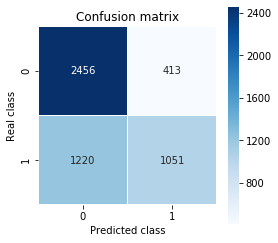

In [285]:
import seaborn as sns

plt.figure(figsize=(4,4))
plt.title('Confusion matrix')
ax = sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', square=True, linewidths=.5)
ax.set_xlabel('Predicted class')
ax.set_ylabel('Real class')

In [ ]:
for i in range(len(y_test)):
    tpr[i] = C[1,1]/(C[1,0]+C[1,1])
    fpr[i]
    
    
    

## XGBoost

In [290]:
df=pd.read_csv('data/preprocess.csv')

y = np.array(df['shot_made_flag']).astype(int)
X = df.drop('shot_made_flag', 1)
X=X.drop('loc_x', axis=1)
X=X.drop('loc_y', axis=1)


cat_ftrs = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent','playoffs','home_play']

cont_ftrs1 = ['shot_distance', 'time_remaining']

X[cont_ftrs1] = X[cont_ftrs1].astype(float)
y = y.astype(float)

In [291]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# one-hot encoder

ohe = OneHotEncoder(sparse=False)
cat_values = ohe.fit_transform(X[cat_ftrs])
cat_ftr_names = ohe.get_feature_names(cat_ftrs)
df_cat = pd.DataFrame(data=cat_values,columns = cat_ftr_names)

#ss = StandardScaler()
#count_values = ss.fit_transform(X[cont_ftrs1])
#df_cont1 = pd.DataFrame(data=count_values,columns = cont_ftrs1)


X_process = pd.concat([df_cat,X[cont_ftrs1]],axis=1)

scaler = StandardScaler()
X_process[cont_ftrs1] = scaler.fit_transform(X_process[cont_ftrs1])

In [292]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_process, y, 
                                                    test_size=0.2, random_state=50)

In [370]:
#GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify=y)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    numeric_features = ['shot_distance', 'time_remaining']
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

    categorical_features = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent']
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
   
   
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier())])    
   
    # the parameter(s) we want to tune

    param_grid = {
        #'classifier__max_depth ': [6],
       #'classifier__learning_rate ': [0.004],
        #'classifier__gamma ': [0],
        #'classifier__reg_alpha ': [0],
        #'classifier__reg_lambda ': [0],
         #'classifier__colsample_bytree ': [0.7],
        #'classifier__subsample ': [0.4],
       # 'classifier__min_child_weight ': [3],
        }

    # prepare gridsearch
    grid = GridSearchCV(clf, param_grid=param_grid, scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,iid=True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [374]:
test_scores = []
for i in range(10):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,i*50,5)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores),3),'+/-',np.around(np.std(test_scores),4))

{}
best CV score: 0.6794279320912584
test score: 0.6852140077821012
{}
best CV score: 0.679865739164275
test score: 0.6863813229571984
{}
best CV score: 0.6812278056136596
test score: 0.6797665369649806
{}
best CV score: 0.6816169674563409
test score: 0.6782101167315175
{}
best CV score: 0.6805467723889672
test score: 0.6809338521400778
{}
best CV score: 0.6812278056136596
test score: 0.6782101167315175
{}
best CV score: 0.6812764508439948
test score: 0.6805447470817121
{}
best CV score: 0.6800603200856156
test score: 0.6844357976653697
{}
best CV score: 0.6832709052877365
test score: 0.6749027237354086
{}
best CV score: 0.6802062557766211
test score: 0.6852140077821012
test accuracy: 0.681 +/- 0.0036


In [409]:
X_test_transformed[5,:]

<1x133 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [293]:
import xgboost as xgb
from sklearn import metrics

d_train = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

In [294]:
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['max_depth'] = 6
params['n_estimators'] = 1000
params['silent'] = 1
params['eta'] = 0.004
params['subsample'] = 0.4
params['colsample_bytree '] = 0.7
params['min_child_weight'] = 3



In [295]:
clf = xgb.train(params, d_train,num_boost_round=2000)
preds = clf.predict(dtest)
y_predict = np.round(preds)
metrics.accuracy_score(y_test,y_predict , normalize=True)

0.6857976653696498

In [296]:
from sklearn.metrics import confusion_matrix
C =  confusion_matrix(y_test, y_predict)
C

array([[2456,  413],
       [1220, 1051]], dtype=int64)

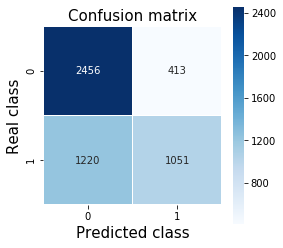

In [377]:
import seaborn as sns

plt.figure(figsize=(4,4))
plt.title('Confusion matrix',fontsize=15)
ax = sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', square=True, linewidths=.5)
ax.set_xlabel('Predicted class',fontsize=15)
ax.set_ylabel('Real class',fontsize=15)
plt.savefig('figures/XGB_cm.pdf',dpi=300,bbox_inches='tight')
plt.show()

In [312]:
y_true = y_test
pred_prob_class1 = preds

fpr = np.zeros(len(y_true))
tpr = np.zeros(len(y_true))

p_crits = np.sort(pred_prob_class1) # the sorted predicted probabilities serve as critical probabilities

for i in range(len(p_crits)):
    p_crit = p_crits[i]
   
    y_pred = np.zeros(len(y_true))
    y_pred[pred_prob_class1 < p_crit] = 0
    y_pred[pred_prob_class1 >= p_crit] = 1
   
    C = confusion_matrix(y_true,y_pred)
   
    tpr[i] = C[1,1]/(C[1,0]+C[1,1])
    fpr[i] = C[0,1]/(C[0,0]+C[0,1])

In [301]:
metrics.auc(fpr, tpr)

0.7043350018164379

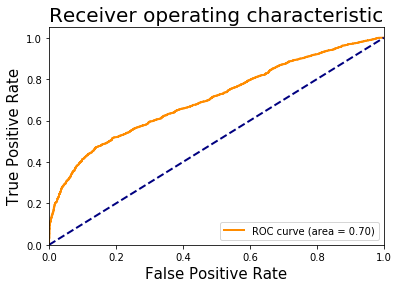

In [378]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr) )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Receiver operating characteristic',fontsize=20)
plt.legend(loc="lower right")
plt.savefig('figures/XGB_ROC.pdf',dpi=300,bbox_inches='tight')
plt.show()

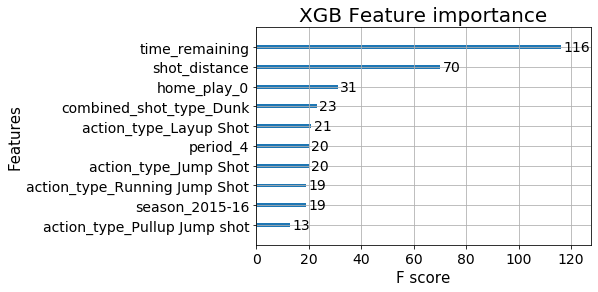

In [519]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# load data

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# plot feature importance
plot_importance(model, max_num_features=10)

plt.xlabel('F score',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.title('XGB Feature importance',fontsize=20)

plt.savefig('figures/XGB_F_importance.pdf',dpi=500,bbox_inches='tight')
plt.show()

## Importance XGboost

In [383]:
def ML_pipeline_kfold(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    numeric_features = ['shot_distance', 'time_remaining']
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

    categorical_features = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent']
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
   
   
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier())])  
    # the parameter(s) we want to tune
    param_grid = {'classifier__max_depth ': [2,4,6],
                 'classifier__learning_rate ': [0.4,0.04,0.004],}
    # prepare gridsearch
    grid = GridSearchCV(clf, param_grid=param_grid,cv=kf, return_train_score = True,n_jobs=-1,verbose=10)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, X_test, y_test

In [400]:
ftr_names = X.columns

In [387]:
grid, X_test, y_test = ML_pipeline_kfold(X,y,50,4)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  25 out of  36 | elapsed:    7.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:    7.6s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  33 out of  36 | elapsed:    8.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    8.8s finished


0.6799143843946102
0.6832684824902724
{'classifier__learning_rate ': 0.4, 'classifier__max_depth ': 2}


In [348]:
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

test_score = grid.score(X_test,y_test)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == 0)/len(y_test))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.6832684824902724
test baseline =  0.558171206225681
shuffling action_type
   shuffled test score: 0.528 +/- 0.004
shuffling combined_shot_type
   shuffled test score: 0.679 +/- 0.001
shuffling period
   shuffled test score: 0.683 +/- 0.0
shuffling playoffs
   shuffled test score: 0.683 +/- 0.0
shuffling season
   shuffled test score: 0.683 +/- 0.001
shuffling shot_distance
   shuffled test score: 0.683 +/- 0.0
shuffling shot_type
   shuffled test score: 0.683 +/- 0.0
shuffling shot_zone_area
   shuffled test score: 0.683 +/- 0.0
shuffling shot_zone_basic
   shuffled test score: 0.683 +/- 0.0
shuffling shot_zone_range
   shuffled test score: 0.683 +/- 0.0
shuffling opponent
   shuffled test score: 0.682 +/- 0.0
shuffling month
   shuffled test score: 0.683 +/- 0.0
shuffling time_remaining
   shuffled test score: 0.683 +/- 0.0
shuffling home_play
   shuffled test score: 0.683 +/- 0.0


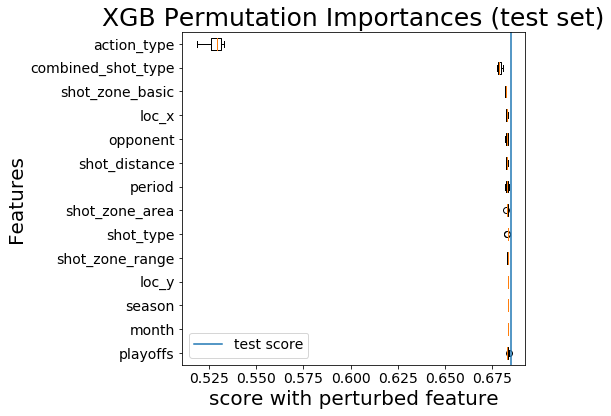

In [517]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("XGB Permutation Importances (test set)",fontsize=25)
plt.xlabel('score with perturbed feature',fontsize=20)
plt.ylabel('Features',fontsize=20)
plt.legend()
plt.tight_layout()
plt.savefig('figures/XGB_Permutation_importance.pdf',dpi=500,bbox_inches='tight')
plt.show()

## Shap

In [451]:
from sklearn.pipeline import make_pipeline

def ML_pipeline_kfold(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    cat_ftrs = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent']
    cont_ftrs = ['shot_distance', 'time_remaining']
    # one-hot encoder
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])
    # standard scaler
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, cont_ftrs),
            ('cat', categorical_transformer, cat_ftrs)])
    pipe = make_pipeline(preprocessor,RandomForestClassifier(n_estimators =  100,random_state=random_state))
    # the parameter(s) we want to tune
    param_grid = {'randomforestclassifier__max_depth': [10,30,100,300],
                  'randomforestclassifier__min_samples_split': [16, 32, 64, 128]}
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, return_train_score = True,n_jobs=-1,verbose=10)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    feature_names = cont_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['cat'][0].get_feature_names(cat_ftrs))
    return grid, np.array(feature_names), X_test, y_test

In [452]:
grid, feature_names, X_test, y_test = ML_pipeline_kfold(X,y,50,4)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done  56 out of  64 | elapsed:   38.2s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   41.5s finished


0.6807413533103079
0.6844357976653697
{'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_split': 64}


In [492]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid.best_estimator_[1])
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed[:1000])
print(np.shape(shap_values))

(5140, 133)
(2, 1000, 133)


In [515]:
index =3 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 1 predictions
plt.savefig('figures/XGB_shap_local.pdf',dpi=500)
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)


0.552502310648441


<Figure size 432x288 with 0 Axes>

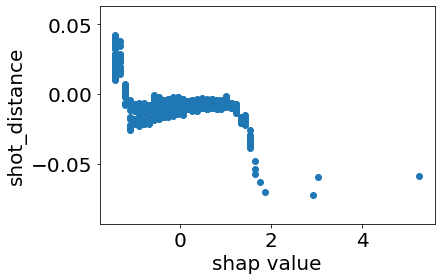

In [482]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
ftr = 'shot_distance'
indx = np.argwhere(feature_names=='shot_distance')
plt.scatter(X_test_transformed[:1000,indx],shap_values[1][:,indx])
plt.xlabel('shap value')
plt.ylabel(ftr)
plt.show()


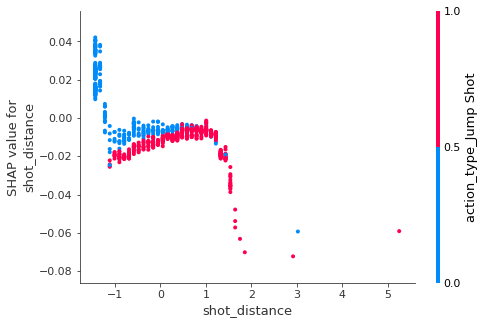

In [486]:
shap.dependence_plot(ftr, shap_values[1], X_test_transformed[:1000], feature_names=feature_names)

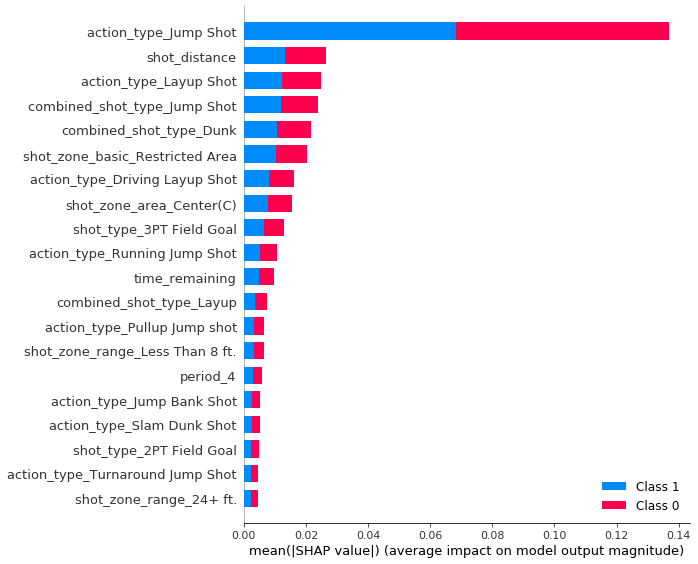

In [488]:
shap.summary_plot(shap_values, X_test_transformed[:1000],feature_names = feature_names, show=False)
plt.savefig('figures/XGB_shap_global.pdf',dpi=500,bbox_inches='tight')

In [65]:
# Create sub models
estimators = []

estimators.append(('lr', LogisticRegression(penalty='l1', C=1.0, solver='saga',max_iter=1000000)))
estimators.append(('gbm', GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, max_features=15, warm_start=True, random_state=50)))
estimators.append(('rf', RandomForestClassifier(bootstrap=True, max_depth=8, n_estimators=200, max_features=20, criterion='entropy', random_state=50)))
estimators.append(('ada', AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1e-2, n_estimators=10, random_state=50)))

# create the ensemble model
ensemble = VotingClassifier(estimators, voting='soft', weights=[3,3,1,1])

results = cross_val_score(ensemble, X_process, y, cv=kf, scoring='accuracy')
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

(0.682) +/- (0.006)
